In [83]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

warnings.filterwarnings('ignore')

In [84]:
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values
print(data)

   ville  janv  fev  mars  avril   mai  juin  juil  aout  sept   oct   nov  \
0   ajac   7.7  8.7  10.5   12.6  15.9  19.8  22.0  22.2  20.3  16.3  11.8   
1   ange   4.2  4.9   7.9   10.4  13.6  17.0  18.7  18.4  16.1  11.7   7.6   
2   ango   4.6  5.4   8.9   11.3  14.5  17.2  19.5  19.4  16.9  12.5   8.1   
3   besa   1.1  2.2   6.4    9.7  13.6  16.9  18.7  18.3  15.5  10.4   5.7   
4   biar   7.6  8.0  10.8   12.0  14.7  17.8  19.7  19.9  18.5  14.8  10.9   
5   bord   5.6  6.6  10.3   12.8  15.8  19.3  20.9  21.0  18.6  13.8   9.1   
6   bres   6.1  5.8   7.8    9.2  11.6  14.4  15.6  16.0  14.7  12.0   9.0   
7   cler   2.6  3.7   7.5   10.3  13.8  17.3  19.4  19.1  16.2  11.2   6.6   
8   dijo   1.3  2.6   6.9   10.4  14.3  17.7  19.6  19.0  15.9  10.5   5.7   
9   embr   0.5  1.6   5.7    9.0  13.0  16.4  18.9  18.3  15.3  10.1   4.6   
10  gren   1.5  3.2   7.7   10.6  14.5  17.8  20.1  19.5  16.7  11.4   6.5   
11  lill   2.4  2.9   6.0    8.9  12.4  15.3  17.1  17.1  14.7  

In [85]:

scaler = StandardScaler()

# Centrer et réduire les données
X_scaled = scaler.fit_transform(X)

# Réduction de dimensionnalité avec PCA pour réduire à 2 dimensions
pca = PCA(0.9)

# Transformation des données réduites à 2 dimensions dans un espace de dimension 2
X_pca = pca.fit_transform(X_scaled)

# Application de l'algorithme de classification K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)

KMeans(n_clusters=3)

In [86]:
# Create a variable which will contain the predicted clusters for each observation
clustering = kmeans.fit_predict(X_pca)
# Check the result
clustering


array([1, 2, 2, 0, 1, 1, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 0, 2, 1, 1, 0, 2,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 0])

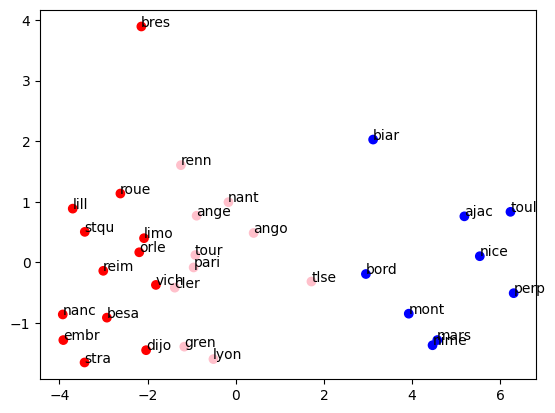

In [87]:
import matplotlib
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering,
cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [88]:
from sklearn.cluster import AgglomerativeClustering
scaler = StandardScaler()
# centrer et réduire les données
X_scaled = scaler.fit_transform(X)

# réduction de dimensionnalité avec PCA
pca = PCA(0.9)
X_pca = pca.fit_transform(X_scaled)

# Application de l'algorithme de classification hiérarchique
agglomerativeClustering = AgglomerativeClustering(3, linkage='single')
agglomerativeClustering.fit(X_pca)

# Création de variable qui contiendra les clusters prédits pour chaque observation
clustering = agglomerativeClustering.fit_predict(X_pca)
# Vérification du résultat
clustering

array([0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

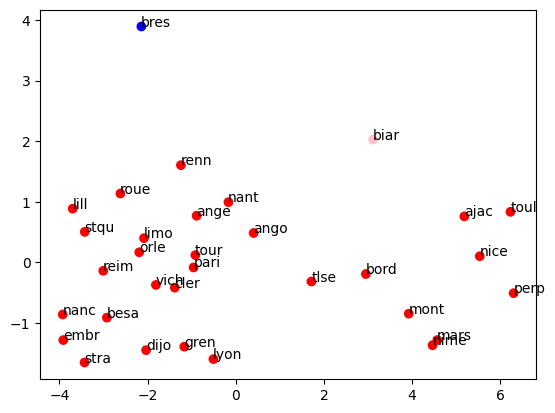

In [89]:
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering,
cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [90]:
scaler = StandardScaler()
# centrer et réduire les données
X_scaled = scaler.fit_transform(X)

# réduction de dimensionnalité avec PCA
pca = PCA(0.9)
X_pca = pca.fit_transform(X_scaled)

# Application de l'algorithme de classification hiérarchique
agglomerativeClustering = AgglomerativeClustering(3, linkage='ward')
agglomerativeClustering.fit(X_pca)

# Création de variable qui contiendra les clusters prédits pour chaque observation
clustering = agglomerativeClustering.fit_predict(X_pca)
# Vérification du résultat
clustering

array([1, 2, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 2, 1, 1, 0, 2,
       1, 0, 2, 0, 0, 0, 1, 1, 2, 2], dtype=int64)

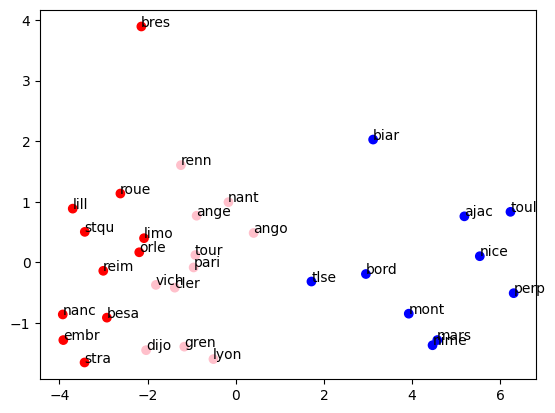

In [91]:
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering,
cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [92]:
scaler = StandardScaler()
# centrer et réduire les données
X_scaled = scaler.fit_transform(X)

# réduction de dimensionnalité avec PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Application de l'algorithme de classification hiérarchique
agglomerativeClustering = AgglomerativeClustering(3, linkage='average')
agglomerativeClustering.fit(X_scaled)

# Création de variable qui contiendra les clusters prédits pour chaque observation
clustering = agglomerativeClustering.fit_predict(X_scaled)
# Vérification du résultat
clustering

array([0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

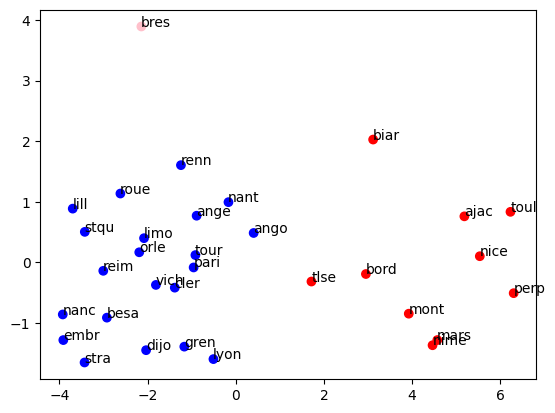

In [93]:
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering,
cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [94]:
scaler = StandardScaler()
# centrer et réduire les données
X_scaled = scaler.fit_transform(X)


# Application de l'algorithme de classification hiérarchique
agglomerativeClustering = AgglomerativeClustering(3, linkage='complete')
agglomerativeClustering.fit(X_scaled)

# Création de variable qui contiendra les clusters prédits pour chaque observation
clustering = agglomerativeClustering.fit_predict(X_scaled)
# Vérification du résultat
clustering

array([1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

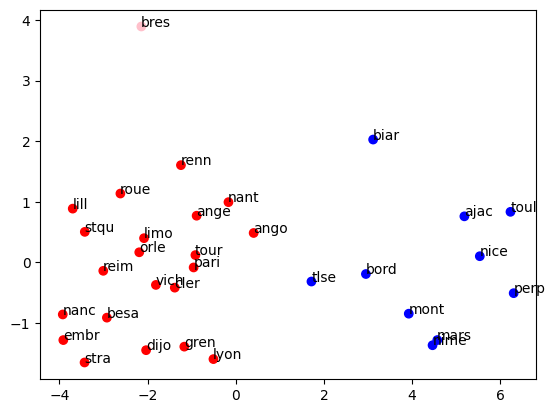

In [95]:
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering,
cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [96]:

silhouette_score_dict = {}
#On cherche le silhouette score pour différentes partitions
for n_clusters in range(2, 7):
    # Centrer les donnees
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    kmeans = KMeans(n_clusters)
    kmeans.fit(X_pca)
    cluster_label = kmeans.fit_predict(X_pca)
    silhouette_score_dict[n_clusters] = silhouette_score(X_pca, cluster_label)

print(silhouette_score_dict)


{2: 0.625557719180767, 3: 0.3738245848404959, 4: 0.36571066522728646, 5: 0.25663586311066783, 6: 0.27345994127587636}


In [97]:
silhouette_score_dict = {}

for n_clusters in range(2, 7):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    agglomerativeClustering = AgglomerativeClustering(n_clusters,linkage='average')
    agglomerativeClustering.fit(X_pca)
    cluster_label = agglomerativeClustering.fit_predict(X_pca)
    silhouette_score_dict[n_clusters] = silhouette_score(X_pca, cluster_label)

print(silhouette_score_dict)

{2: 0.625557719180767, 3: 0.4956874462691092, 4: 0.4040924812969341, 5: 0.3394375281333685, 6: 0.3157090741187427}


In [98]:
silhouette_score_dict = {}

for n_clusters in range(2, 7):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    agglomerativeClustering = AgglomerativeClustering(n_clusters,linkage='ward')
    agglomerativeClustering.fit(X_pca)
    cluster_label = agglomerativeClustering.fit_predict(X_pca)
    silhouette_score_dict[n_clusters] = silhouette_score(X_pca, cluster_label)

print(silhouette_score_dict)

{2: 0.625557719180767, 3: 0.36807826080005457, 4: 0.3182505663395758, 5: 0.3327321988641234, 6: 0.3213410121722648}


In [99]:
silhouette_score_dict = {}

for n_clusters in range(2, 7):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    agglomerativeClustering = AgglomerativeClustering(n_clusters,linkage='single')
    agglomerativeClustering.fit(X_pca)
    cluster_label = agglomerativeClustering.fit_predict(X_pca)
    silhouette_score_dict[n_clusters] = silhouette_score(X_pca, cluster_label)

print(silhouette_score_dict)

{2: 0.1782894788190169, 3: -0.03440482633721324, 4: 0.18321799761188373, 5: 0.4053830103017648, 6: 0.321177188885836}


In [100]:
silhouette_score_dict = {}

for n_clusters in range(2, 7):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    agglomerativeClustering = AgglomerativeClustering(n_clusters,linkage='complete')
    agglomerativeClustering.fit(X_pca)
    cluster_label = agglomerativeClustering.fit_predict(X_pca)
    silhouette_score_dict[n_clusters] = silhouette_score(X_pca, cluster_label)

print(silhouette_score_dict)

{2: 0.625557719180767, 3: 0.4956874462691092, 4: 0.3822282154258682, 5: 0.3327321988641234, 6: 0.3213410121722648}


In [101]:
def fct_hybride(X):
    k = X.shape[0]
    # On essaye de réduire le nombre d'élément en prenant la racine de nombre de données 
    # et on applique le Kmeans sur le nouveau nombre de données
    kmeans = KMeans(int(np.sqrt(k)))
    kmeans.fit(X)
    # On applique le CAH sur les nouveaux groupes formées à partir du Kmeans 
    agglomerative = AgglomerativeClustering(3,linkage='ward')
    agglomerative.fit(X)
    clustering_hierarchique = agglomerative.fit_predict(X)
    # Grace au CAH on récupère les meilleurs centres de gravités
    centroids = []
    for i in range(n_clusters):
        cluster_points = X[clustering_hierarchique == i]
        if cluster_points.shape[0] > 0:
            centroids.append(cluster_points.mean(axis=0))
    # On applique le Kmeans avec les nouveaux centroids trouvés
    centroids = np.array(centroids)
    kmeans_final = KMeans(3,init = centroids)
    kmeans_final.fit(X_pca)
    clustering = kmeans_final.fit_predict(X)
    return clustering

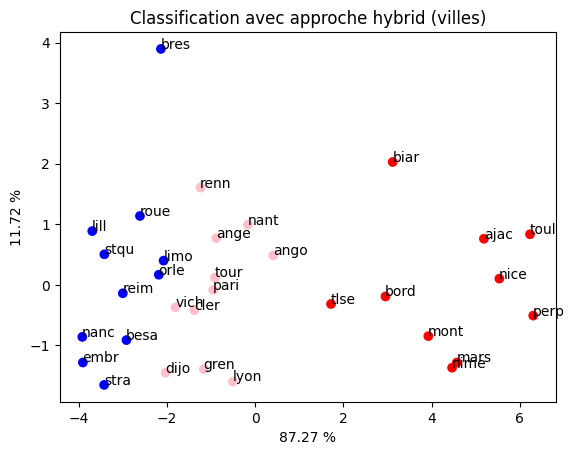

In [102]:
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
colors = ['red','yellow','blue','pink']
plt.title("Classification avec approche hybrid (villes)")
plt.xlabel("%.2f %%" % round(pca.explained_variance_ratio_[0]*100, 2))
plt.ylabel("%.2f %%" % round(pca.explained_variance_ratio_[1]*100, 2))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= fct_hybride(X_scaled),
cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

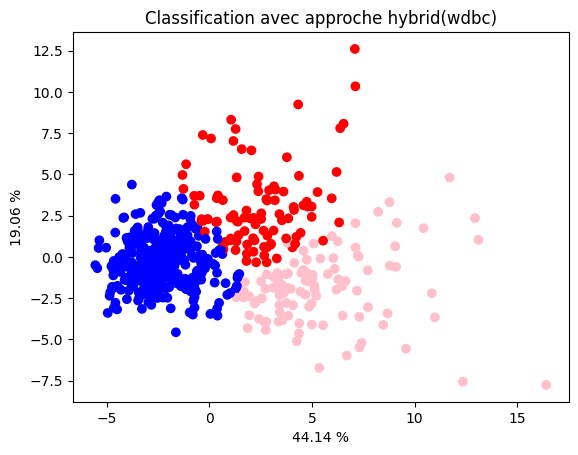

In [103]:
X = pd.read_csv('./wdbc.csv', sep=';')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
colors = ['red','yellow','blue','pink']
plt.title("Classification avec approche hybrid(wdbc)")
plt.xlabel("%.2f %%" % round(pca.explained_variance_ratio_[0]*100, 2))
plt.ylabel("%.2f %%" % round(pca.explained_variance_ratio_[1]*100, 2))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= fct_hybride(X_scaled),
cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

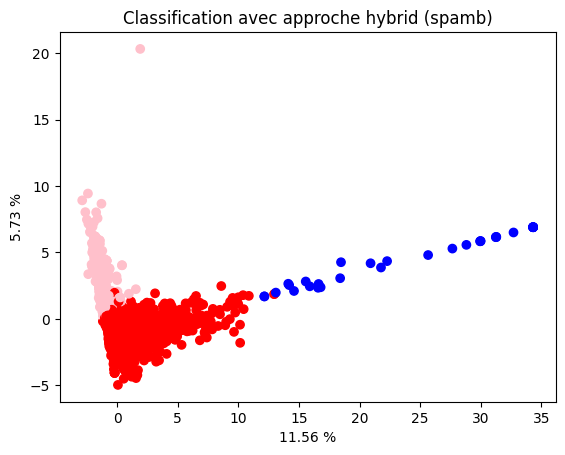

(4600, 57)


In [104]:
X = pd.read_csv('./spamb.csv', sep=';')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
colors = ['red','yellow','blue','pink']
plt.title("Classification avec approche hybrid (spamb)")
plt.xlabel("%.2f %%" % round(pca.explained_variance_ratio_[0]*100, 2))
plt.ylabel("%.2f %%" % round(pca.explained_variance_ratio_[1]*100, 2))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= fct_hybride(X_scaled),
cmap=matplotlib.colors.ListedColormap(colors))
plt.show()
print(X.shape)